# 6 Visualise laballed data and remove artefacts

Code that let us overlay each frame of video with outputs from the models. And create time series plots. 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import ultralytics.utils as ultrautils
import utils
import display
import json

In [2]:
videos_in = r"..\LookitLaughter.test"
metadata_file = "_LookitLaughter.xlsx"
data_out = r"..\data\1_interim"
videos_out = r"..\data\2_final"

#a couple of files for testing
VIDEO_FILE  = os.path.join(videos_in, "2UWdXP.joke1.rep2.take1.Peekaboo.mp4")
VIDEO_FILE2 = os.path.join(videos_in, "2UWdXP.joke2.rep1.take1.NomNomNom.mp4")
AUDIO_FILE = os.path.join(data_out, "2UWdXP.joke1.rep2.take1.Peekaboo.wav")
SPEECH_FILE = os.path.join(data_out, "2UWdXP.joke1.rep2.take1.Peekaboo.json")

testset = [VIDEO_FILE, VIDEO_FILE2] 

In [3]:
processedvideos = utils.getprocessedvideos(data_out)
processedvideos.head()

Found existing processedvideos.xlsx


,VideoID,ChildID,JokeType,JokeNum,JokeRep,JokeTake,HowFunny,LaughYesNo,Frames,FPS,...,Audio.file,Faces.when,Faces.file,LastError,Speech.file,Speech.when,Objects.file,Objects.when,Understand.file,Understand.when
0,2UWdXP.joke1.rep2.take1.Peekaboo.mp4,2UWdXP,Peekaboo,1,2,1,Slightly funny,No,217,14.298910,...,..\data\1_interim\\2UWdXP.joke1.rep2.take1.Pee...,2023-10-04 11:31:32,..\data\1_interim\2UWdXP.joke1.rep2.take1.Peek...,NaN,..\data\1_interim\2UWdXP.joke1.rep2.take1.Peek...,2023-09-20 16:58:38,NaN,NaN,NaN,NaN
1,2UWdXP.joke1.rep3.take1.Peekaboo.mp4,2UWdXP,Peekaboo,1,3,1,Slightly funny,No,152,14.359089,...,..\data\1_interim\\2UWdXP.joke1.rep3.take1.Pee...,2023-10-04 11:33:44,..\data\1_interim\2UWdXP.joke1.rep3.take1.Peek...,NaN,..\data\1_interim\2UWdXP.joke1.rep3.take1.Peek...,2023-09-20 16:58:39,NaN,NaN,NaN,NaN
2,2UWdXP.joke2.rep1.take1.NomNomNom.mp4,2UWdXP,NomNomNom,2,1,1,Funny,No,95,13.241315,...,..\data\1_interim\\2UWdXP.joke2.rep1.take1.Nom...,2023-10-04 11:35:09,..\data\1_interim\2UWdXP.joke2.rep1.take1.NomN...,NaN,..\data\1_interim\2UWdXP.joke2.rep1.take1.NomN...,2023-09-20 16:58:40,NaN,NaN,NaN,NaN
3,2UWdXP.joke2.rep2.take1.NomNomNom.mp4,2UWdXP,NomNomNom,2,2,1,Slightly funny,No,97,14.213813,...,..\data\1_interim\\2UWdXP.joke2.rep2.take1.Nom...,2023-10-04 11:36:15,..\data\1_interim\2UWdXP.joke2.rep2.take1.NomN...,NaN,..\data\1_interim\2UWdXP.joke2.rep2.take1.NomN...,2023-09-20 16:58:40,NaN,NaN,NaN,NaN
4,2UWdXP.joke2.rep3.take1.NomNomNom.mp4,2UWdXP,NomNomNom,2,3,1,Slightly funny,No,133,14.223092,...,..\data\1_interim\\2UWdXP.joke2.rep3.take1.Nom...,2023-10-04 11:38:34,..\data\1_interim\2UWdXP.joke2.rep3.take1.NomN...,NaN,..\data\1_interim\2UWdXP.joke2.rep3.take1.NomN...,2023-09-20 16:58:48,NaN,NaN,NaN,NaN


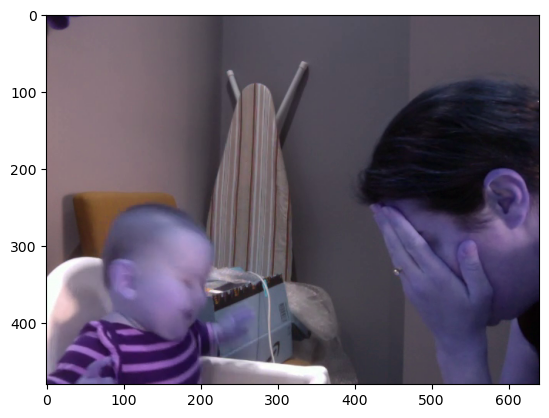

We have a keypoints file for this video


In [11]:
#let's grab a single frame from the video

framenum = 100
video = cv2.VideoCapture(VIDEO_FILE)
video.set(cv2.CAP_PROP_POS_FRAMES, framenum)
ret, frame = video.read()

if ret:
    plt.imshow(frame)
    plt.show()

#look in processed videos to see if we have a keypoints file for this video
videoname = os.path.basename(VIDEO_FILE)
videodata = processedvideos[processedvideos['VideoID'] == videoname]
if videodata.shape[0] > 0:
    print("We have a keypoints file for this video")
    kptsfile = videodata['Keypoints.file'].values[0]
    #Load the keypoints file
    kpts = pd.read_csv(kptsfile)
    kpts.head()

video.release()

In [5]:
print(f"kptsfile: {kptsfile}")

kpts.iloc[3]

kptsfile: ..\data\1_interim\2UWdXP.joke1.rep2.take1.Peekaboo.csv


frame                        3
person                   child
index                        0
bbox.x1             395.546387
bbox.y1              57.723068
bbox.x2             639.838013
bbox.y2                  480.0
bbox.c                0.519463
nose.x              451.206238
nose.y              312.775391
nose.c                0.950903
left_eye.x          467.204437
left_eye.y          267.338623
left_eye.c            0.988065
right_eye.x         454.171204
right_eye.y         275.966919
right_eye.c            0.23554
left_ear.x          572.157776
left_ear.y          238.928513
left_ear.c            0.967395
right_ear.x         519.890564
right_ear.y         258.796753
right_ear.c           0.002977
left_shoulder.x     583.715942
left_shoulder.y     429.665161
left_shoulder.c       0.451757
right_shoulder.x    599.972229
right_shoulder.y    384.976929
right_shoulder.c      0.284799
left_elbow.x        433.458069
left_elbow.y             480.0
left_elbow.c          0.029976
right_el

In [9]:


bboxlabels, bboxes, xycs = utils.getframekpts(kpts, 100)
print(bboxlabels)
print(bboxes)
print(xycs)

['child: 0', 'adult: 1']
[[     413.88      74.948      639.83         480]
 [    0.67584      246.46      314.68         480]]
[[     500.89      347.01     0.52779      490.22      306.72     0.71149      502.47      323.54    0.022459      562.61      249.08     0.74954      580.61      294.63   0.0017945         640      397.04     0.20739         640      383.86     0.19471      628.18         480    0.024444      600.86      466.08
     0.056087      543.05      419.03     0.18676      537.86       430.9     0.30838      634.39         480  0.00073335         640      456.83   0.0014618      595.61      384.04   0.0031496      639.96      335.55   0.0082733      531.86      435.85   0.0032835      519.38      381.44   0.0078899]
 [     203.38      364.81     0.98399      204.03      347.89     0.66692      184.26      346.22     0.99364      184.97      348.66   0.0019566      106.19      343.49     0.98222      160.59      392.92     0.88341      37.974      410.06     0.70744  

480 640


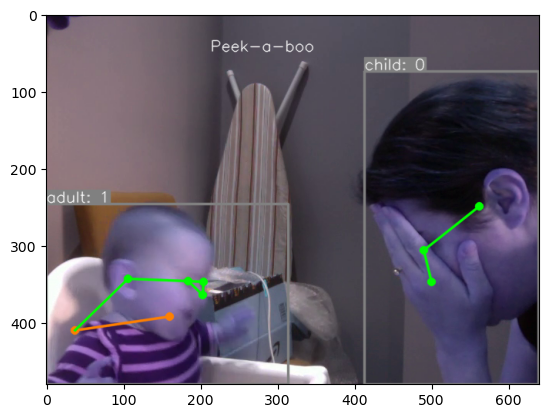

In [12]:
h, w = frame.shape[:2]
print(h,w)    

frame = display.drawOneFrame(frame, bboxlabels, bboxes, xycs,"Peek-a-boo")

plt.imshow(frame)
plt.show()


In [8]:
with open(SPEECH_FILE) as f:
    speechjson = json.load(f)
caption = display.WhisperExtractCurrentCaption(speechjson, 100, 15)
print(caption)

 Ah, I can't handle this.


In [39]:
width = 640
height = 480
capbox = [[int(width /2), int(0.9*height), int(width/2), int(0.9*height)]]

print(capbox[0][3])

432


In [35]:
#look in processed videos to see if we have a keypoints file for this video
videoname = os.path.basename(VIDEO_FILE)
videodata = processedvideos[processedvideos['VideoID'] == videoname]
if videodata.shape[0] > 0:
    kptsfile = videodata['Keypoints.file'].values[0]
    if os.path.exists(kptsfile):
        print(f"Keypoints found: {kptsfile}")
        kpts = pd.read_csv(kptsfile, index_col=None)
    facesfile = videodata['Faces.file'].values[0]
    if os.path.exists(facesfile):
        print(f"Face data found: {facesfile}")
        facedata = pd.read_csv(facesfile, index_col=None)
    speechfile = videodata['Speech.file'].values[0]
    if os.path.exists(speechfile):
        print(f"Speech data found: {speechfile}")
        #open speech json file
        with open(speechfile) as f:
            speechdata = json.load(f)


Keypoints found: ..\data\1_interim\2UWdXP.joke1.rep2.take1.Peekaboo.csv
Face data found: ..\data\1_interim\2UWdXP.joke1.rep2.take1.Peekaboo.faces.ssd.csv
Speech data found: ..\data\1_interim\2UWdXP.joke1.rep2.take1.Peekaboo.json
Writing video to ..\data\2_final\2UWdXP.joke1.rep2.take1.Peekaboo_annotated.mp4


In [ ]:
kpts = relabelPersonIndex(kpts, person = "child", index = 0, newPerson = "temp", newIndex = 100)
kpts = relabelPersonIndex(kpts, person = "adult", index = 1, newPerson = "child", newIndex = 0)
kpts = relabelPersonIndex(kpts, person = "temp", index = 100,newPerson = "adult",  newIndex = 1)   

In [ ]:


annotatedVideo = display.createAnnotatedVideo(VIDEO_FILE, kpts, facedata, speechdata, videos_out)



In [36]:
#Add the audio file back onto the annotated video
annotatedVideo = r"..\data\2_final\2UWdXP.joke1.rep2.take1.Peekaboo_annotated.mp4"

from moviepy.editor import *
videoclip = VideoFileClip(annotatedVideo)
audioclip = AudioFileClip(AUDIO_FILE)

videoclip = videoclip.set_audio(audioclip)
#note need to save with a different name as the original video is still open
videoclip.write_videofile(r"..\data\2_final\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4")

Moviepy - Building video ..\data\2_final\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4.
MoviePy - Writing audio in 2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ..\data\2_final\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4



Moviepy - Done !
Moviepy - video ready ..\data\2_final\2UWdXP.joke1.rep2.take1.Peekaboo_annotated_audio.mp4


In [37]:
videoclip.ipython_display()


Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [8]:



bbox1 = kpts.iloc[3,4:8].values
xyxy = ultrautils.ops.xywh2xyxy(bbox1)

print(xyxy)

[395.54640197753906 57.72306823730469 639.8379974365234 480.00001525878906]


In [18]:
framefaces = facedata[facedata['frame'] == 10]
faceboxes = framefaces.iloc[:,4:8].values
print(faceboxes)
xyxy = ultrautils.ops.xywh2xyxy(faceboxes)
print(xyxy)

[[435 166 155 205]]
[[357  63 512 268]]


In [33]:
def relabelPersonIndex(df, person = None, index = None, newPerson = None,  newIndex = None, startFrame = None, endFrame = None):
    '''replace person and/or index values with new values for a range of frames'''
    if startFrame is None:
        startFrame = 0
    if endFrame is None:
        endFrame = df['frame'].max()
    if person is None and index is None:
        return df
    if person is not None and index is None:
        #just person
        df.loc[(df['frame'] >= startFrame) & (df['frame'] <= endFrame) & (df['person'] == person), 'person'] = newPerson
    if person is None and index is not None:
        #just index
        df.loc[(df['frame'] >= startFrame) & (df['frame'] <= endFrame) & (df['index'] == index), 'index'] = newIndex
    if person is not None and index is not None:
        #both
        df.loc[(df['frame'] >= startFrame) & (df['frame'] <= endFrame) & (df['person'] == person) & (df['index'] == index), 'person'] = newPerson
        df.loc[(df['frame'] >= startFrame) & (df['frame'] <= endFrame) & (df['person'] == newPerson) & (df['index'] == index), 'index'] = newIndex
    return df

In [25]:


kpts.head()

,Unnamed: 0,frame,person,index,bboxcent.x,bboxcent.y,bbox.width,bbox.height,bbox.c,nose.x,...,left_knee.c,right_knee.x,right_knee.y,right_knee.c,left_ankle.x,left_ankle.y,left_ankle.c,right_ankle.x,right_ankle.y,right_ankle.c
0,0,0,child,1,506.500000,272.000000,267.000000,416.000000,0.814496,414.992188,...,0.002259,531.112488,376.236572,0.006121,533.869812,411.200470,0.002614,526.426941,364.012299,0.006508
1,1,1,child,1,511.324005,271.530609,257.351990,416.938751,0.846705,429.151062,...,0.001489,542.338257,366.595001,0.005873,533.722168,407.547699,0.002503,525.947205,363.911499,0.008185
2,2,2,child,1,516.104309,270.374695,247.690033,419.250610,0.762082,447.805542,...,0.001132,575.497437,417.850220,0.004892,517.922913,441.914154,0.001508,559.945923,381.484741,0.005159
3,3,3,child,1,517.692200,268.861542,244.291595,422.276947,0.519463,451.206238,...,0.002987,540.925537,431.976471,0.003907,500.927673,427.211487,0.002987,483.234283,387.557556,0.004137
4,4,4,child,1,424.609161,267.640533,430.781677,424.718903,0.597568,455.920197,...,0.002831,412.489899,410.772247,0.005747,334.505920,433.655823,0.005509,327.953430,408.523560,0.010319
